## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [4]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data


In [8]:
data = get_data(data_path="motorbike_ambulance_calls.csv")
print(data)

       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0      

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [32]:

print(data.describe())

            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.

**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [33]:
print(data.isnull().sum())

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [34]:
print(data.max())


index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object


In [35]:
print(data.min())

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object


In [36]:
print(data.shape)

(17379, 15)


**Висновки з 1-3 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [37]:

def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

data = transform_date(data, 'date')



C:\Users\User\AppData\Local\Temp\ipykernel_31064\4230976203.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [38]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
date = get_time_limits(data,'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


**Завдання 5** виділити категоріальні змінні в окремий датасет







In [39]:
categorical_columns = data.select_dtypes(include=['object']).columns
data_categorical = data[categorical_columns]
print(data_categorical)

       season
0      spring
1      spring
2      spring
3      spring
4      spring
...       ...
17374  spring
17375  spring
17376  spring
17377  spring
17378  spring

[17379 rows x 1 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [40]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].astype('category').cat.codes # .cat.codes унікальні значення
  return df
  
data = encode_season(data, 'season')
print(data.head())

   index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01       1   0     1   0        0        6           0   
1      2 2011-01-01       1   0     1   1        0        6           0   
2      3 2011-01-01       1   0     1   2        0        6           0   
3      4 2011-01-01       1   0     1   3        0        6           0   
4      5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

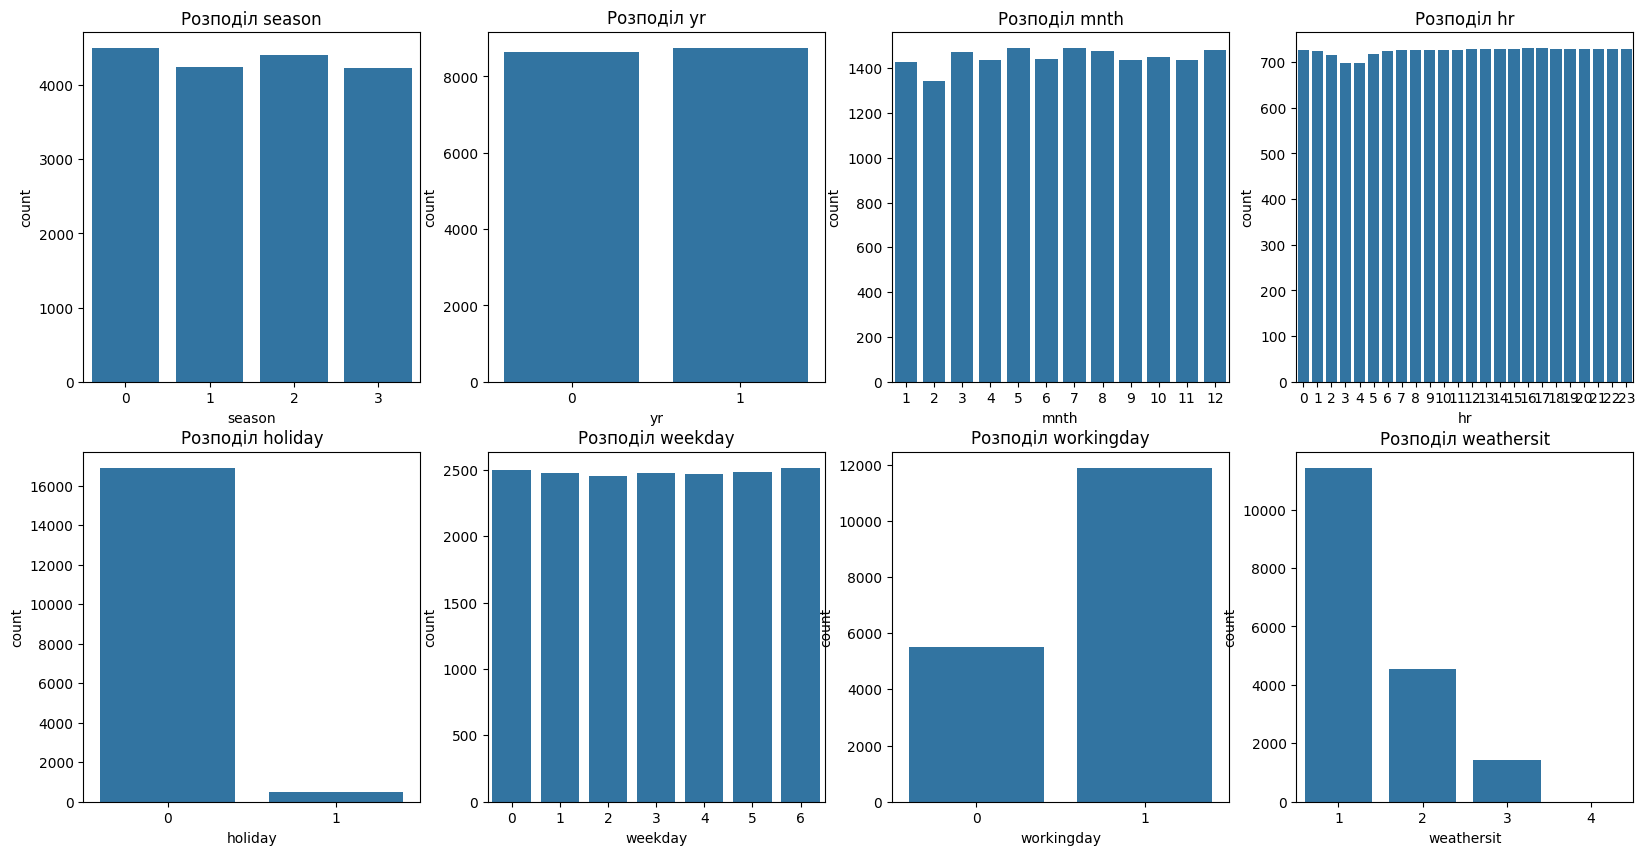

In [41]:
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(data=data, x=variable, ax=subplot)
    subplot.set_title(f'Розподіл {variable}')
plt.show()

**Завдання 8** виділити числові змінні в окремий датасет

In [42]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numerical = data[numerical_columns]
print(data_numerical)

       index  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0          1   0     1   0        0        6           0           1  0.24   
1          2   0     1   1        0        6           0           1  0.22   
2          3   0     1   2        0        6           0           1  0.22   
3          4   0     1   3        0        6           0           1  0.24   
4          5   0     1   4        0        6           0           1  0.24   
...      ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374  17375   1    12  19        0        1           1           2  0.26   
17375  17376   1    12  20        0        1           1           2  0.26   
17376  17377   1    12  21        0        1           1           1  0.26   
17377  17378   1    12  22        0        1           1           1  0.26   
17378  17379   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  cnt  
0      0.2879  0.81     0

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

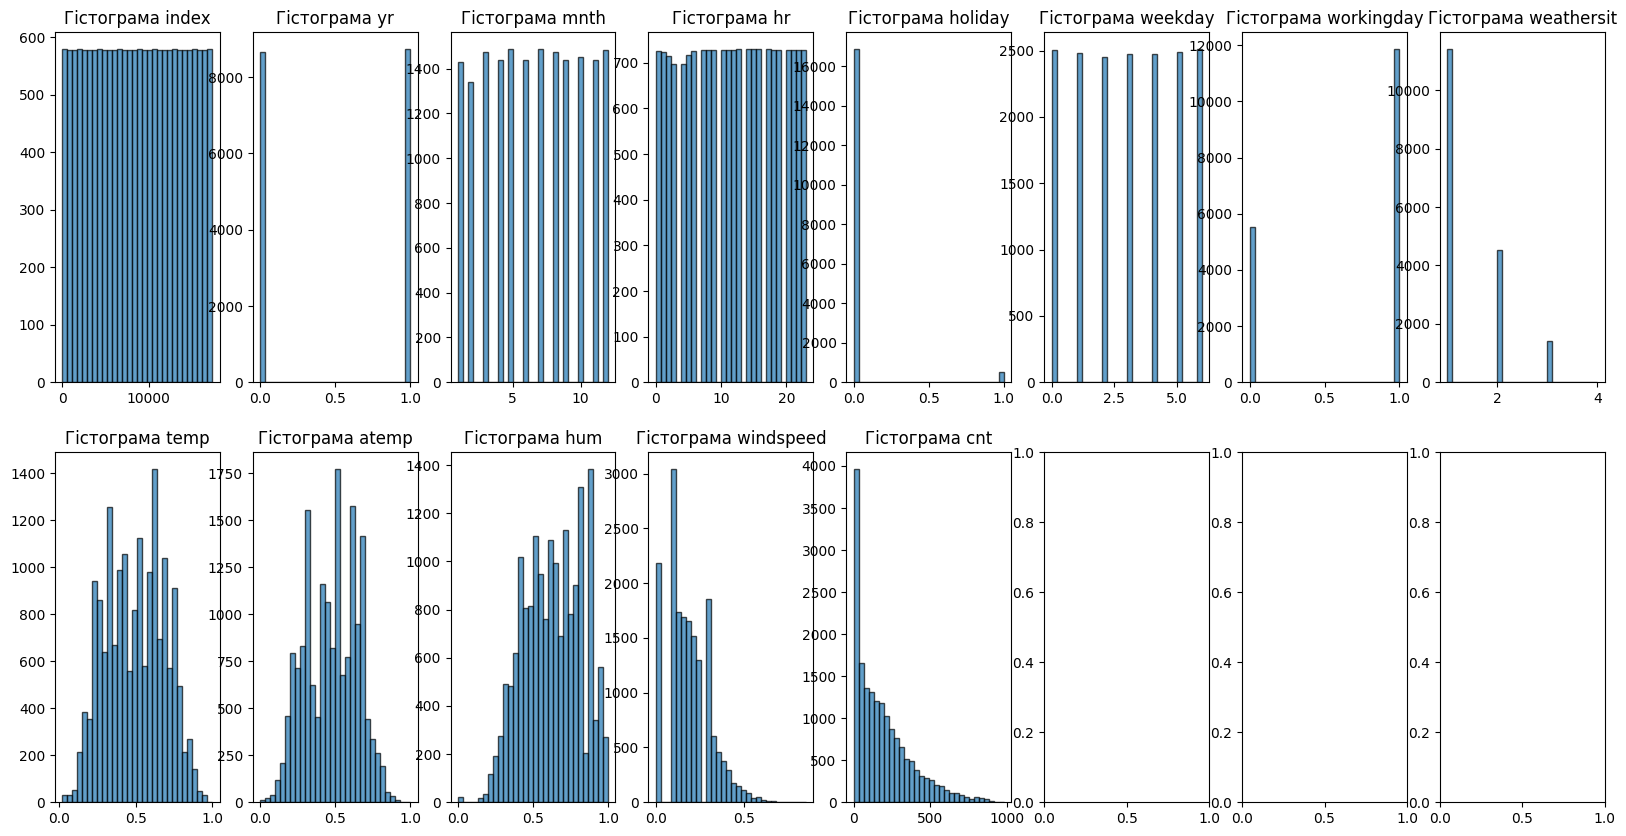

In [43]:
fig, ax = plt.subplots(2, 8, figsize=(20, 10))
for variable, subplot in zip(data_numerical.columns, ax.flatten()):
    subplot.hist(data_numerical[variable], bins=30, edgecolor='black', alpha=0.7)
    subplot.set_title(f'Гістограма {variable}')

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

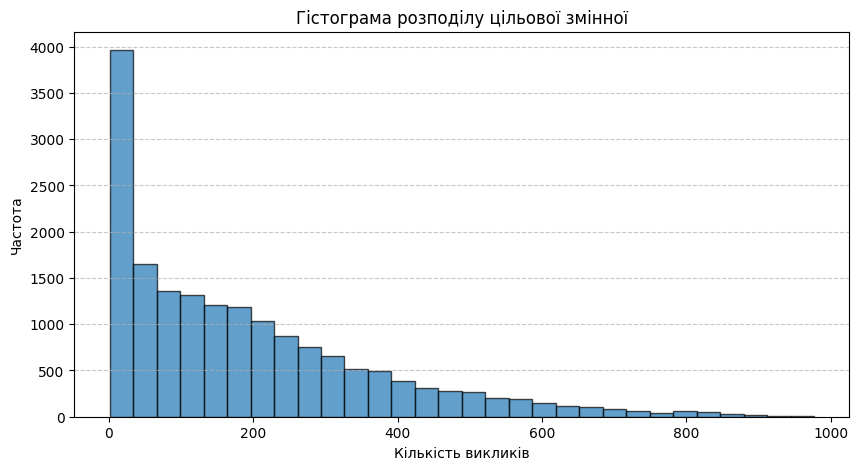

np.float64(1.2771911026957805)

In [44]:
target_variable = "cnt"

plt.figure(figsize=(10, 5))
plt.hist(data[target_variable], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Кількість викликів")
plt.ylabel("Частота")
plt.title("Гістограма розподілу цільової змінної")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


n = len(data[target_variable])
mean_value = data[target_variable].mean()
std_dev = data[target_variable].std()

third_moment = ((data[target_variable] - mean_value) ** 3).sum() / n

manual_skewness = third_moment / (std_dev ** 3)
manual_skewness

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

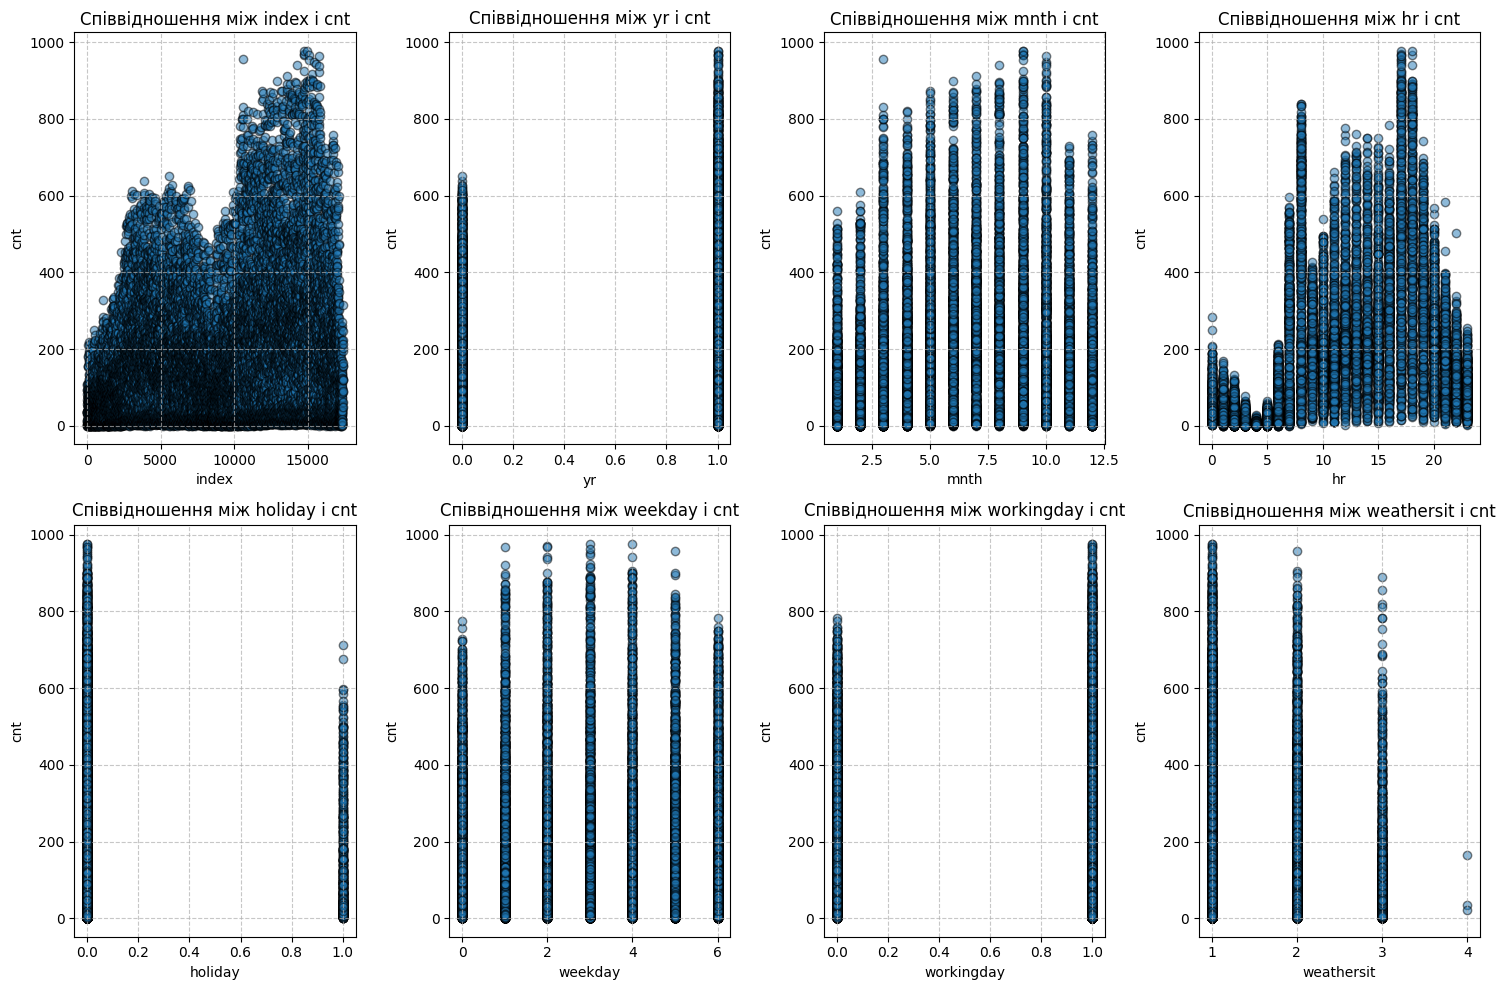

In [45]:
fig, ax = plt.subplots(2,4, figsize=(15, 10))
for var, subplot in zip(data_numerical.columns, ax.flatten()):
    subplot.scatter(data[var], data["cnt"], alpha=0.5, edgecolor="black")
    subplot.set_xlabel(var)
    subplot.set_ylabel("cnt")
    subplot.set_title(f"Співвідношення між {var} і cnt")
    subplot.grid(True, linestyle="--", alpha=0.7)

# Відображаємо графіки
plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

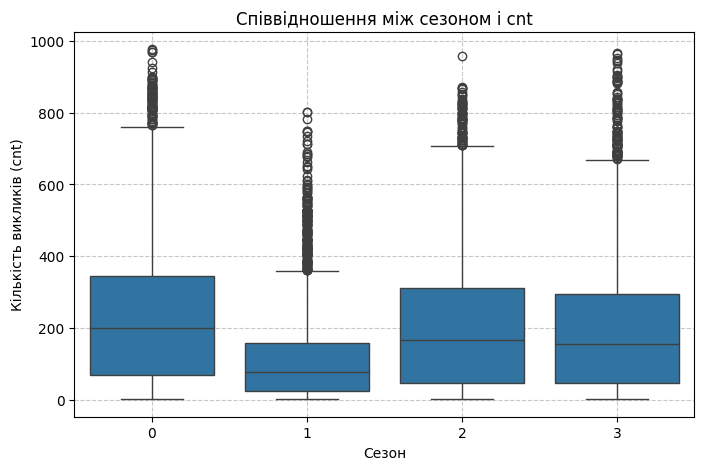

In [46]:
categorical_columns = ["season"] 

plt.figure(figsize=(8, 5))
sns.boxplot(x=data["season"], y=data["cnt"])
plt.xlabel("Сезон")
plt.ylabel("Кількість викликів (cnt)")
plt.title("Співвідношення між сезоном і cnt")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

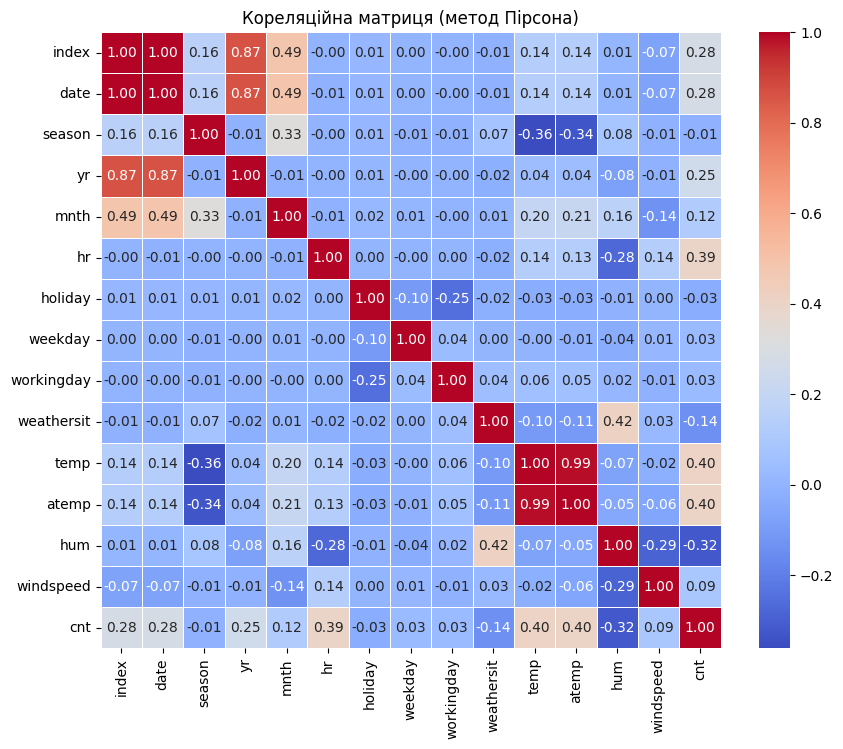

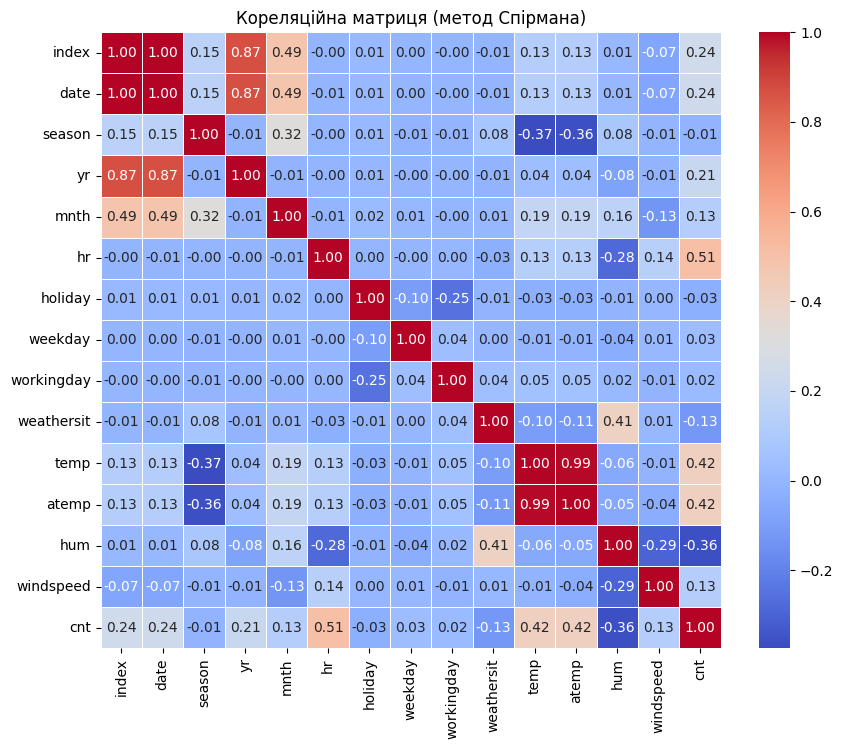

In [47]:
pearson_corr = data.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Кореляційна матриця (метод Пірсона)")
plt.show()

spearman_corr = data.corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Кореляційна матриця (метод Спірмана)")
plt.show()




**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [13]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([
        df,
        pd.get_dummies(df['season']),
        pd.get_dummies(df['mnth'], prefix='mnth'),
        pd.get_dummies(df['hr'], prefix='hr'),
        pd.get_dummies(df['weekday'], prefix='weekday'),
        pd.get_dummies(df['weathersit'], prefix='weathersit')
    ], axis=1)

    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

    return features


In [14]:
features = get_dummies(data)
features


,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,1/1/11,0,0,0,0,0.24,0.2879,0.81,0.0000,...,False,False,False,False,False,True,True,False,False,False
1,2,1/1/11,0,1,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
2,3,1/1/11,0,2,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
3,4,1/1/11,0,3,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
4,5,1/1/11,0,4,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,1,19,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17375,17376,12/31/12,1,20,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17376,17377,12/31/12,1,21,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,True,False,False,False
17377,17378,12/31/12,1,22,0,1,0.26,0.2727,0.56,0.1343,...,True,False,False,False,False,False,True,False,False,False


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [15]:
def is_night_hour(hour):
    return hour < 6 or hour >= 23

def add_night_hours_feature(df):
    df['night_hours'] = df['hr'].map(is_night_hour)
    return df.drop(columns=['hr'])

features = add_night_hours_feature(features)
features['night_hours'] = features['night_hours'].astype(int)
features

,index,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,night_hours
0,1,1/1/11,0,0,0,0.24,0.2879,0.81,0.0000,16,...,False,False,False,False,True,True,False,False,False,1
1,2,1/1/11,0,0,0,0.22,0.2727,0.80,0.0000,40,...,False,False,False,False,True,True,False,False,False,1
2,3,1/1/11,0,0,0,0.22,0.2727,0.80,0.0000,32,...,False,False,False,False,True,True,False,False,False,1
3,4,1/1/11,0,0,0,0.24,0.2879,0.75,0.0000,13,...,False,False,False,False,True,True,False,False,False,1
4,5,1/1/11,0,0,0,0.24,0.2879,0.75,0.0000,1,...,False,False,False,False,True,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,1,0,1,0.26,0.2576,0.60,0.1642,119,...,False,False,False,False,False,False,True,False,False,0
17375,17376,12/31/12,1,0,1,0.26,0.2576,0.60,0.1642,89,...,False,False,False,False,False,False,True,False,False,0
17376,17377,12/31/12,1,0,1,0.26,0.2576,0.60,0.1642,90,...,False,False,False,False,False,True,False,False,False,0
17377,17378,12/31/12,1,0,1,0.26,0.2727,0.56,0.1343,61,...,False,False,False,False,False,True,False,False,False,0


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [16]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)


In [17]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [19]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

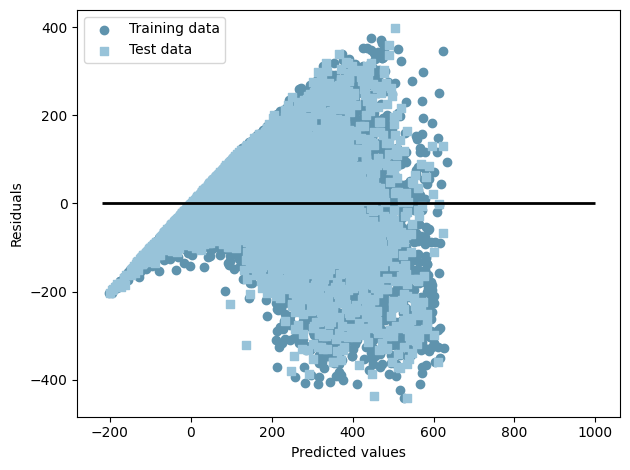

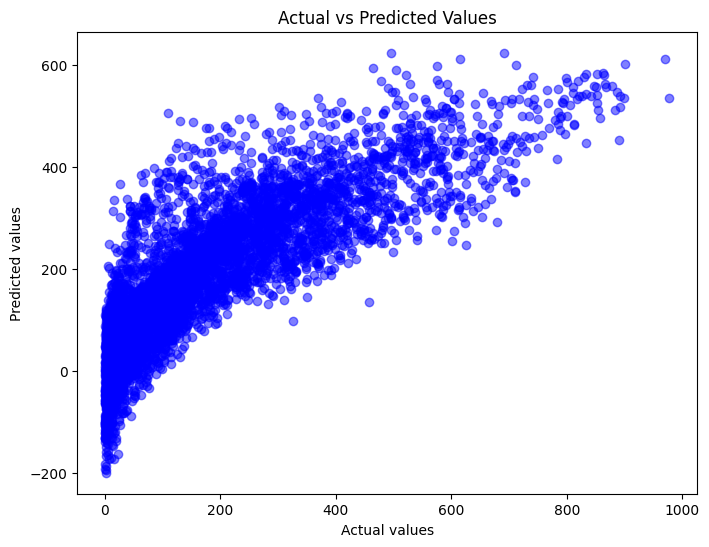

In [21]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, c='blue', alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

